In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv("train_v9rqX0R.csv")
test_df = pd.read_csv("test_AbJTz2l.csv")

In [3]:
train_df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
train_df.info()
print ('----------------------------------------------')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
---------------------------------------------

In [5]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


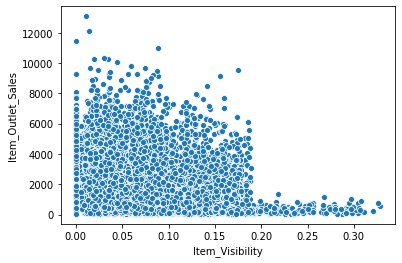

In [6]:
sns.scatterplot(x="Item_Visibility", y="Item_Outlet_Sales", data=train_df)

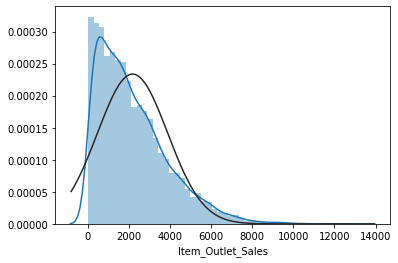

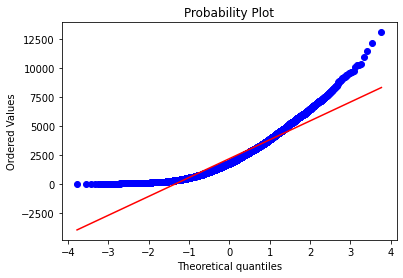

In [7]:
sns.distplot(train_df['Item_Outlet_Sales'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_df['Item_Outlet_Sales'], plot=plt)

In [8]:
#applying sqrt transformation
train_df['Item_Outlet_Sales'] = train_df['Item_Outlet_Sales']**(0.5)

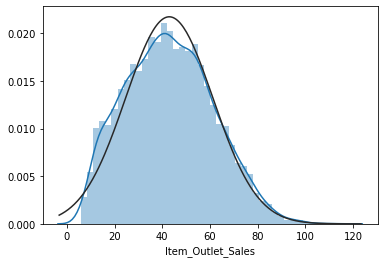

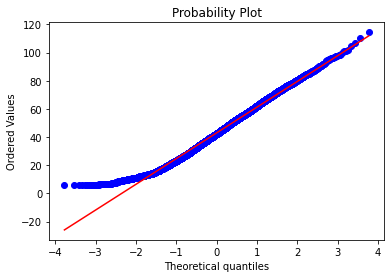

In [9]:
sns.distplot(train_df['Item_Outlet_Sales'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_df['Item_Outlet_Sales'], plot=plt)

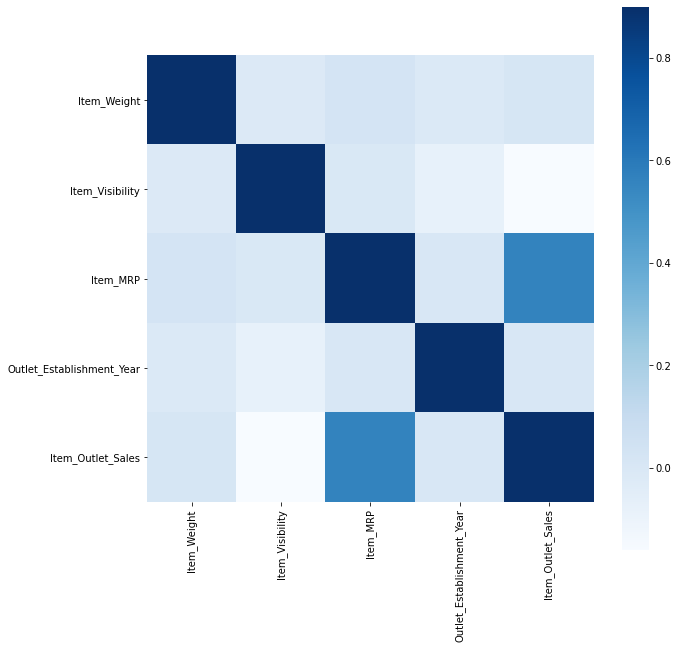

In [11]:
corr = train_df.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)

In [12]:
missing_val = pd.concat([train_df.isnull().sum(), test_df.isnull().sum()], axis=1, keys=['Train', 'Test'])
missing_val[missing_val.sum(axis=1) > 0]

,Train,Test
Item_Weight,1463,976.0
Outlet_Size,2410,1606.0


In [13]:
y = train_df["Item_Outlet_Sales"]
train_df=train_df.iloc[:,0:11]

In [14]:
df=pd.concat([train_df,test_df],axis=0)

In [15]:
df.shape

(14204, 11)

In [16]:
#impute missing values
df['Item_Weight'] = df['Item_Weight'].fillna((df['Item_Weight'].mean()))
df['Outlet_Size'] = df['Outlet_Size'].replace(np.nan, 'Unknown', regex=True)

In [20]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

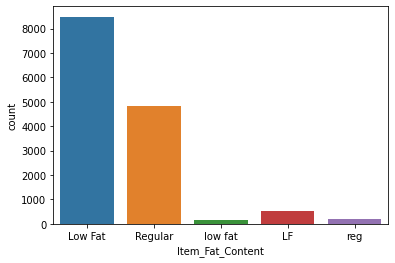

In [17]:
sns.countplot(x="Item_Fat_Content", data=df)

In [18]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})

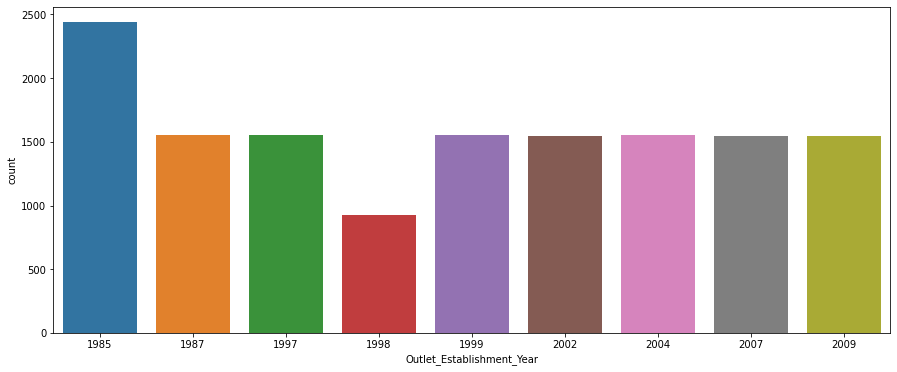

In [21]:
plt.subplots(figsize=(15,6))
sns.countplot(x="Outlet_Establishment_Year", data=df)

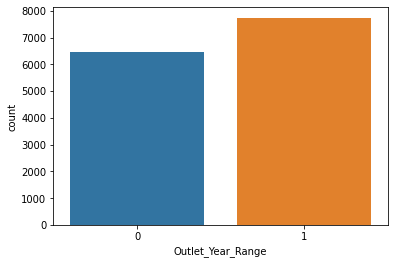

In [22]:
df['Outlet_Year_Range']=0
df.loc[df['Outlet_Establishment_Year']<=1998,'Outlet_Year_Range']=0
df.loc[df['Outlet_Establishment_Year']>1998,'Outlet_Year_Range']=1
df.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)
sns.countplot(x="Outlet_Year_Range", data=df)

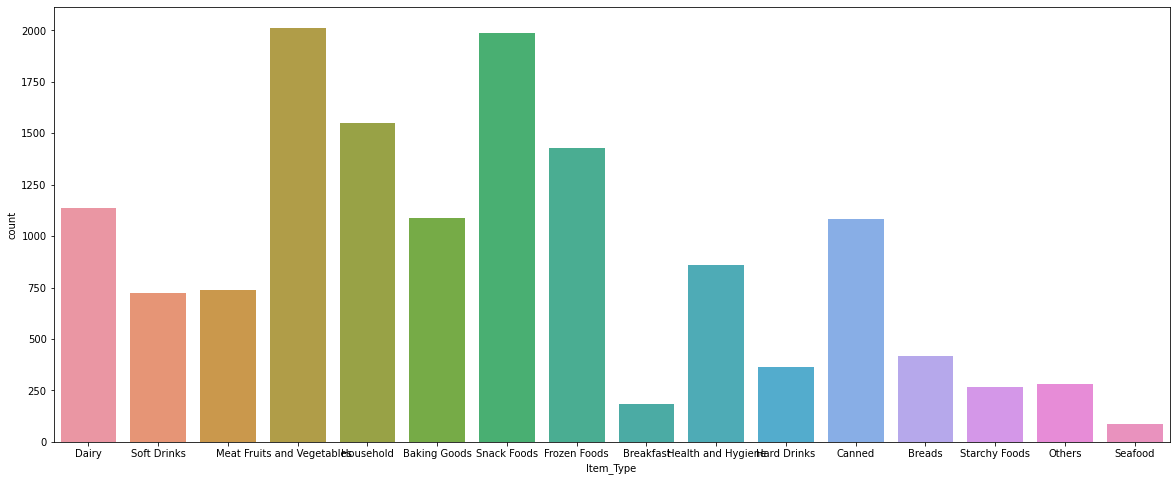

In [28]:
plt.subplots(figsize=(20,8))
sns.countplot(x="Item_Type", data=df)

In [29]:
df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [32]:
df['Item_Type'].replace(['Canned','Meat','Seafood','Dairy','Soft Drinks','Hard Drinks','Starchy Foods','Breads', 'Household', 'Health and Hygiene', 'Breakfast' ],
                        ['Frozen Foods','Frozen Foods','Frozen Foods','Liquid','Liquid','Liquid','Baking Goods','Baking Goods','Others','Others', 'Others'],inplace=True)

In [33]:
df['Item_Type'].value_counts()

Frozen Foods             3335
Others                   2872
Liquid                   2224
Fruits and Vegetables    2013
Snack Foods              1989
Baking Goods             1771
Name: Item_Type, dtype: int64

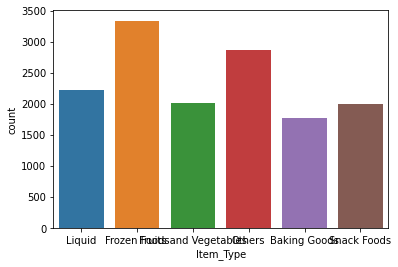

In [35]:
sns.countplot(x="Item_Type", data=df)

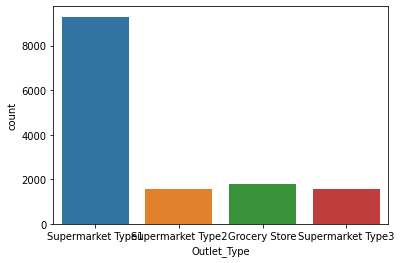

In [23]:
sns.countplot(x="Outlet_Type", data=df)

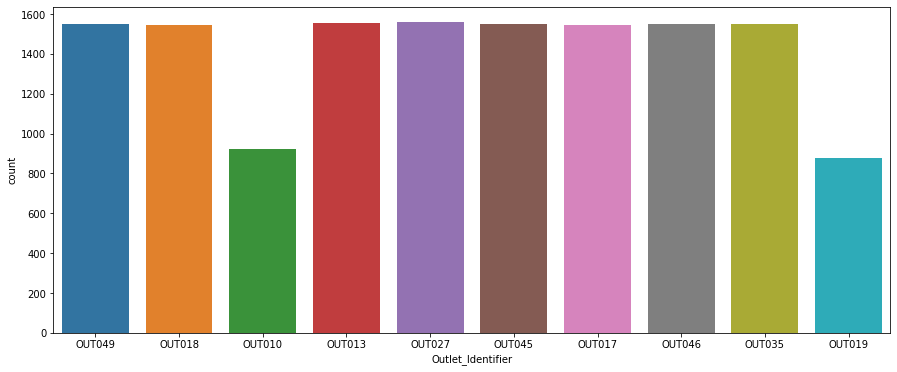

In [24]:
plt.subplots(figsize=(15,6))
sns.countplot(x="Outlet_Identifier", data=df)

In [25]:
df['Item_Identifier'].value_counts()

FDQ12    10
FDX50    10
FDR21    10
FDW32    10
FDE17    10
         ..
FDL50     7
FDI46     7
FDM52     7
NCW54     7
FDR51     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [36]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Year_Range
0,FDA15,9.30,Low Fat,0.016047,Liquid,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,1
1,DRC01,5.92,Regular,0.019278,Liquid,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,1
2,FDN15,17.50,Low Fat,0.016760,Frozen Foods,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,1
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Unknown,Tier 3,Grocery Store,0
4,NCD19,8.93,Low Fat,0.000000,Others,53.8614,OUT013,High,Tier 3,Supermarket Type1,0


In [37]:
X=df.iloc[:,0:11]

In [39]:
from sklearn.preprocessing import LabelEncoder
label_x = LabelEncoder()

In [40]:
X.iloc[:,0]=label_x.fit_transform(X.iloc[:,0])
X.iloc[:,2]=label_x.fit_transform(X.iloc[:,2])
X.iloc[:,4]=label_x.fit_transform(X.iloc[:,4])
X.iloc[:,6]=label_x.fit_transform(X.iloc[:,6])
X.iloc[:,7]=label_x.fit_transform(X.iloc[:,7])
X.iloc[:,8]=label_x.fit_transform(X.iloc[:,8])
X.iloc[:,9]=label_x.fit_transform(X.iloc[:,9])

In [43]:
X.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Year_Range
0,156,9.300000,0,0.016047,3,249.8092,9,1,0,1,1
1,8,5.920000,1,0.019278,3,48.2692,3,1,2,2,1
2,662,17.500000,0,0.016760,1,141.6180,9,1,0,1,1
3,1121,19.200000,1,0.000000,2,182.0950,0,3,2,0,0
4,1297,8.930000,0,0.000000,4,53.8614,1,0,2,1,0
5,758,10.395000,1,0.000000,0,51.4008,3,1,2,2,1
6,696,13.650000,1,0.012741,5,57.6588,1,0,2,1,0
7,738,12.792854,0,0.127470,5,107.7622,5,1,2,3,0
8,440,16.200000,1,0.016687,1,96.9726,7,3,1,1,1
9,990,19.200000,1,0.094450,1,187.8214,2,3,1,1,1


In [44]:
x=np.zeros((14204, 11))

In [45]:
x_train=x[0:8523,:]
x_test=x[8523:,:]

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_train,y,test_size=0.3,random_state=42)

In [47]:
from xgboost import XGBRegressor
model = XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5)
model.fit(X_train, y_train)

[17:57:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [48]:
y_pred=model.predict(X_test)

In [52]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_pred,y_test)
mse

334.9387331646802

In [53]:
from xgboost import XGBRegressor
xgmodel = XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5)
xgmodel.fit(x_train,y)

[18:01:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [54]:
yt_pred=xgmodel.predict(x_test)

In [55]:
yt_pred = yt_pred**(2)

In [56]:
submission = pd.DataFrame({"Item_Identifier": test_df["Item_Identifier"],
                           "Outlet_Identifier": test_df["Outlet_Identifier"],
                           "Item_Outlet_Sales": yt_pred })
submission.to_csv('submission.csv', index=False)